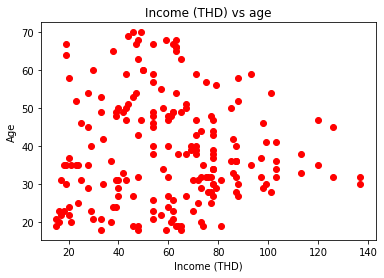

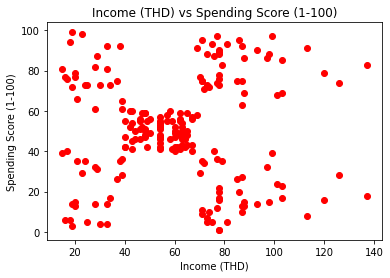


 Spending score vs age plotting



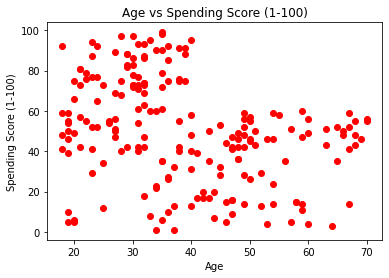


 Spending score vs Income vs age plotting



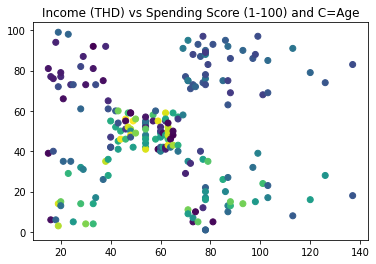

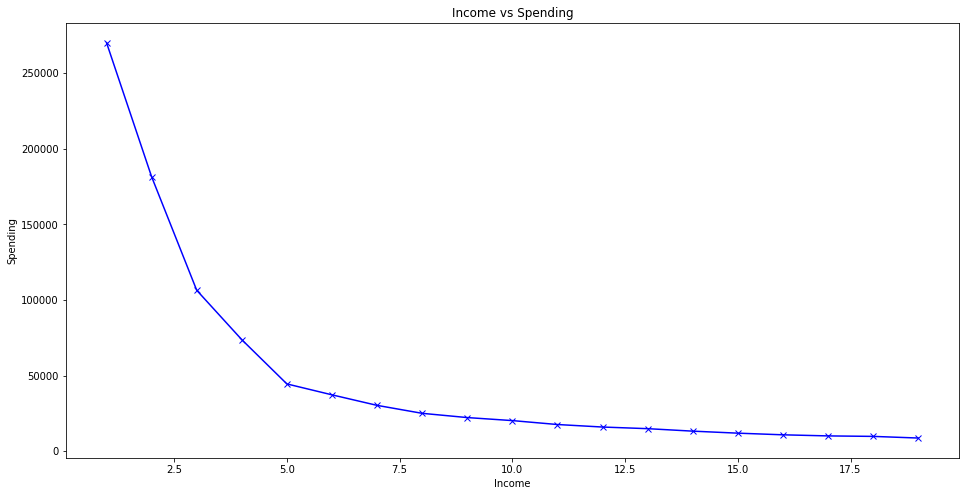

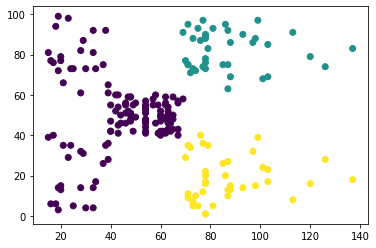

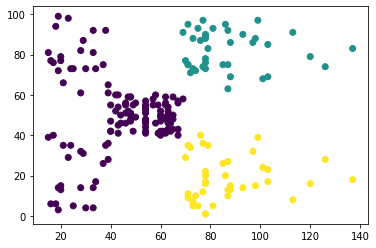

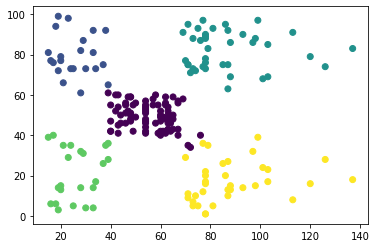

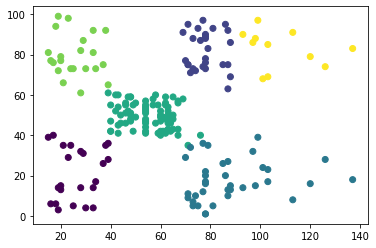

Number of clusters from 2 to 19: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
For n_clusters = 2, silhouette score is 0.2965167311215868
For n_clusters = 3, silhouette score is 0.4671264942977645
For n_clusters = 4, silhouette score is 0.49369523511548846
For n_clusters = 5, silhouette score is 0.5541446796204179
For n_clusters = 6, silhouette score is 0.5410411871359793
For n_clusters = 7, silhouette score is 0.5327101345818385
For n_clusters = 8, silhouette score is 0.45854013950590267
For n_clusters = 9, silhouette score is 0.4581689704998002
For n_clusters = 10, silhouette score is 0.4505873675162661
For n_clusters = 11, silhouette score is 0.44515537320416854
For n_clusters = 12, silhouette score is 0.4400443397643773
For n_clusters = 13, silhouette score is 0.42365237726710364
For n_clusters = 14, silhouette score is 0.4186349372846408
For n_clusters = 15, silhouette score is 0.4204044838281923
For n_clusters = 16, silhouette score is 0.4334916895508394
For 

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

data.count()

import matplotlib.pyplot as plt

data.columns=['id', 'gender','age', 'income', 'spending']

plt.plot(data.income, data.age, 'ro')
plt.xlabel("Income (THD)")
plt.ylabel("Age")
plt.title('Income (THD) vs age')
plt.show()

plt.plot(data.income, data.spending, 'ro')
plt.xlabel("Income (THD)")
plt.ylabel("Spending Score (1-100)") 
plt.title('Income (THD) vs Spending Score (1-100)')
plt.show()

print("\n Spending score vs age plotting\n")
plt.plot(data.age, data.spending, 'ro')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title('Age vs Spending Score (1-100)')
plt.show()



print("\n Spending score vs Income vs age plotting\n")
plt.scatter(data.income, data.spending,c=data['age'])
plt.title('Income (THD) vs Spending Score (1-100) and C=Age')
plt.show()



# Changing sex attribute as male to 1 and Female to 0
dictionary = {'Male':1, 'Female':0}
data.gender=[dictionary[item] for item in data.gender]
del data['id']

data_1 = data
del data_1['gender']
del data_1['age']

%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_1)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Income vs Spending')
plt.show()

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)

data['k_means']=kmeanModel.predict(data)
plt.scatter(data.income, data.spending,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(data.income, data.spending,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(data.income, data.spending,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(data.income, data.spending,c=data['k_means'])
plt.show()


#Use silhouette score
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,20))
print ("Number of clusters from 2 to 19: \n", range_n_clusters)

a=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score (data, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    a.append(score)

max_val=max(a)
max_index = a.index(max_val)
max_clus=max_index+2
print("\n Using silhouette_score we get  silhouette score is maximum for {} clusters with score {}.\n So, the optimul number of clusters is {}.\n".format(max_clus, max_val, max_clus))




